In [1]:
!pip install peakdetect

In [2]:
import pandas as pd
import numpy as np

In [3]:
folder = "repos"

with open("repos.txt") as fil:
    all_repos=fil.readlines()

In [4]:
original_repos = [x.replace("\n","") for x in all_repos]
all_repos = [x.replace("\n","").replace("/","-") for x in all_repos]


In [5]:
import os
BASE_DIR = os.getcwd()


In [6]:
repo_data = {}

In [7]:

filename=BASE_DIR+"/"+folder+"/"+all_repos[0]+".csv"
df = pd.read_csv(filename)

repo_data[original_repos[0]]=[len(df),df.iloc[-1].commit_date]

df["repo_name"] = original_repos[0]
df = df.drop(df.columns[0], axis=1)
df


,commit_author,commit_date,repo_name
0,simminu,2021-10-05T08:02:27Z,simsimee/Faceswap_and_Deepfake_Detection
1,simminu,2021-10-05T08:02:05Z,simsimee/Faceswap_and_Deepfake_Detection
2,simminu,2021-10-05T07:57:46Z,simsimee/Faceswap_and_Deepfake_Detection
3,simminu,2021-10-05T07:51:17Z,simsimee/Faceswap_and_Deepfake_Detection
4,simminu,2021-10-05T07:44:54Z,simsimee/Faceswap_and_Deepfake_Detection
5,simminu,2021-10-01T12:06:38Z,simsimee/Faceswap_and_Deepfake_Detection
6,simminu,2021-09-23T06:03:48Z,simsimee/Faceswap_and_Deepfake_Detection
7,simminu,2021-09-22T17:50:25Z,simsimee/Faceswap_and_Deepfake_Detection
8,simminu,2021-09-22T17:48:44Z,simsimee/Faceswap_and_Deepfake_Detection
9,simminu,2021-09-22T17:46:13Z,simsimee/Faceswap_and_Deepfake_Detection


In [8]:
from os.path import exists

for i,repo in enumerate(all_repos[1:]):
    filename=BASE_DIR+"/"+folder+"/"+repo+".csv"
    if exists(filename):
        tmp_df = pd.read_csv(filename)
        tmp_df["repo_name"] = original_repos[i+1]
        tmp_df = tmp_df.drop(tmp_df.columns[0], axis=1)
        df = pd.concat([df,tmp_df] )
        repo_data[original_repos[i+1]]=[len(tmp_df),tmp_df.iloc[-1].commit_date]




In [9]:
print("Number of commits:", len(df))

Number of commits: 40588


In [10]:
print("Number of repos observed:", len(df.repo_name.unique()))

Number of repos observed: 1372


In [11]:
df["commit_date"] = pd.to_datetime(df["commit_date"]) 

In [12]:
df = df.set_index("commit_date")
df = df.rename(columns={"commit_author":"commits"})
df.head()

,commits,repo_name
commit_date,,
2021-10-05 08:02:27+00:00,simminu,simsimee/Faceswap_and_Deepfake_Detection
2021-10-05 08:02:05+00:00,simminu,simsimee/Faceswap_and_Deepfake_Detection
2021-10-05 07:57:46+00:00,simminu,simsimee/Faceswap_and_Deepfake_Detection
2021-10-05 07:51:17+00:00,simminu,simsimee/Faceswap_and_Deepfake_Detection
2021-10-05 07:44:54+00:00,simminu,simsimee/Faceswap_and_Deepfake_Detection


In [13]:
#grouped_df = df.distict("commits").resample("MS").count()

[Timestamp('2018-02-01 00:00:00+0000', tz='UTC', freq='MS'), 22]
[Timestamp('2020-03-01 00:00:00+0000', tz='UTC', freq='MS'), 114]
[Timestamp('2021-05-01 00:00:00+0000', tz='UTC', freq='MS'), 116]
[Timestamp('2022-05-01 00:00:00+0000', tz='UTC', freq='MS'), 97]


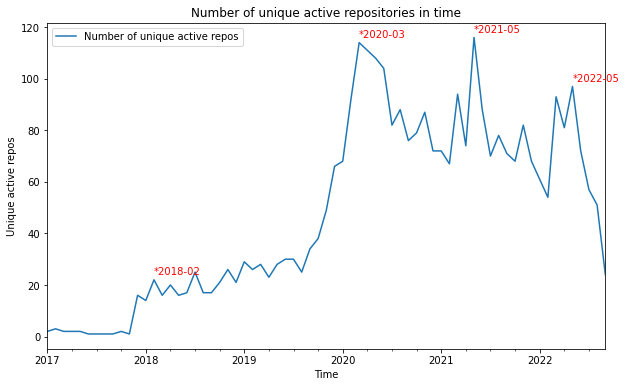

In [14]:
import peakdetect
import matplotlib.pyplot as plt

regrouped_df = df[(df.index>"2017")&(df.index<"2022-10")].groupby([pd.Grouper(freq="MS")])

repo_peaks = peakdetect.peakdetect(regrouped_df.repo_name.nunique(), regrouped_df.repo_name.nunique().index, lookahead=3, delta=5)

ax = regrouped_df.repo_name.nunique().plot()

locs, labels = plt.xticks()

for peak in repo_peaks[0]:
    print(peak)
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]+2), fontsize=10, color="red")

ax.set_title("Number of unique active repositories in time")    
ax.legend(["Number of unique active repos"])
ax.set_xlabel("Time")
ax.set_ylabel("Unique active repos")
plt.gcf().set_size_inches(10, 6)

plt.show() 

[Timestamp('2018-03-01 00:00:00+0000', tz='UTC', freq='MS'), 29]
[Timestamp('2019-02-01 00:00:00+0000', tz='UTC', freq='MS'), 33]
[Timestamp('2020-03-01 00:00:00+0000', tz='UTC', freq='MS'), 157]
[Timestamp('2021-05-01 00:00:00+0000', tz='UTC', freq='MS'), 145]
[Timestamp('2022-05-01 00:00:00+0000', tz='UTC', freq='MS'), 125]


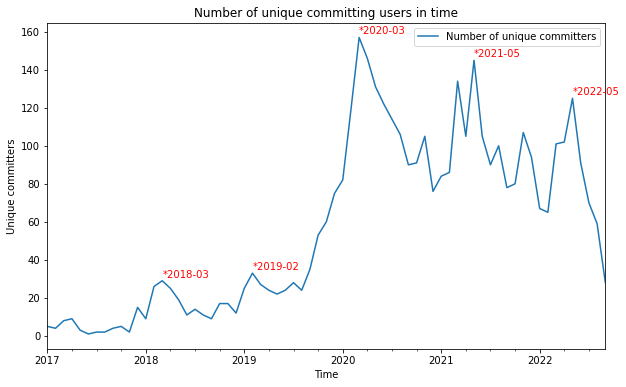

In [47]:
repo_peaks = peakdetect.peakdetect(regrouped_df.commits.nunique(), regrouped_df.commits.nunique().index, lookahead=3, delta=5)

ax = regrouped_df.commits.nunique().plot()

locs, labels = plt.xticks()

for peak in repo_peaks[0]:
    print(peak)
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]+2), fontsize=10, color="red")

ax.set_title("Number of unique committing users in time")    
ax.legend(["Number of unique committers"])
ax.set_xlabel("Time")
ax.set_ylabel("Unique committers")
plt.gcf().set_size_inches(10, 6)
plt.show()

In [16]:
unstacked_df = df[(df.index>"2017")&(df.index<"2022-10")].groupby([pd.Grouper(freq="MS"),"repo_name"]).count().unstack(fill_value=0)
unstacked_df = unstacked_df[unstacked_df.max().sort_values(ascending=False).index.to_list()]

In [17]:
manual_order = []
for col in unstacked_df.columns:
    print(unstacked_df[col].values)
    manual_order.append(unstacked_df[col].values)
    
np.array(manual_order).ravel()

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 150 200 124  40   2   3   0   2   1   0   0   1   1   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   2 191   0   0   1   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1  13 164  68 118   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  75   1  7

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  3
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
unstacked_df

commits                                   \
repo_name                 xnbox/DeepfakeHTTP AppState-CS3667/coinage-deepfake   
commit_date                                                                     
2017-01-01 00:00:00+00:00                  0                                0   
2017-02-01 00:00:00+00:00                  0                                0   
2017-03-01 00:00:00+00:00                  0                                0   
2017-04-01 00:00:00+00:00                  0                                0   
2017-05-01 00:00:00+00:00                  0                                0   
...                                      ...                              ...   
2022-05-01 00:00:00+00:00                  0                                0   
2022-06-01 00:00:00+00:00                  0                                0   
2022-07-01 00:00:00+00:00                  1                                0   
2022-08-01 00:00:00+00:00                  1                                0   
2022-09-01 00:00:00+00:00                  0                                0   

                                                                              \
repo_name                 kahxuan/singing_deepfake cfosco/deepfake_detection   
commit_date                                                                    
2017-01-01 00:00:00+00:00                        0                         0   
2017-02-01 00:00:00+00:00                        0                         0   
2017-03-01 00:00:00+00:00                        0                         0   
2017-04-01 00:00:00+00:00                        0                         0   
2017-05-01 00:00:00+00:00                        0                         0   
...                                            ...                       ...   
2022-05-01 00:00:00+00:00                        0                         0   
2022-06-01 00:00:00+00:00                        0                         0   
2022-07-01 00:00:00+00:00                        0                         0   
2022-08-01 00:00:00+00:00                        0                         0   
2022-09-01 00:00:00+00:00                        0                         0   

                                            \
repo_name                 qAp/kgl_deepfake   
commit_date                                  
2017-01-01 00:00:00+00:00                0   
2017-02-01 00:00:00+00:00                0   
2017-03-01 00:00:00+00:00                0   
2017-04-01 00:00:00+00:00                0   
2017-05-01 00:00:00+00:00                0   
...                                    ...   
2022-05-01 00:00:00+00:00                0   
2022-06-01 00:00:00+00:00                0   
2022-07-01 00:00:00+00:00                0   
2022-08-01 00:00:00+00:00                0   
2022-09-01 00:00:00+00:00                0   

                                                                 \
repo_name                 jklewis99/MultimodalDeepfakeDetection   
commit_date                                                       
2017-01-01 00:00:00+00:00                                     0   
2017-02-01 00:00:00+00:00                                     0   
2017-03-01 00:00:00+00:00                                     0   
2017-04-01 00:00:00+00:00                                     0   
2017-05-01 00:00:00+00:00                                     0   
...                                                         ...   
2022-05-01 00:00:00+00:00                                     0   
2022-06-01 00:00:00+00:00                                     0   
2022-07-01 00:00:00+00:00                                     0   
2022-08-01 00:00:00+00:00                                     0   
2022-09-01 00:00:00+00:00                                     0   

                                                              \
repo_name                 sigmaister/disrupting-deepfakes-_-   
commit_date                                                    
2017-

/tmp/ipykernel_5769/3147422890.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


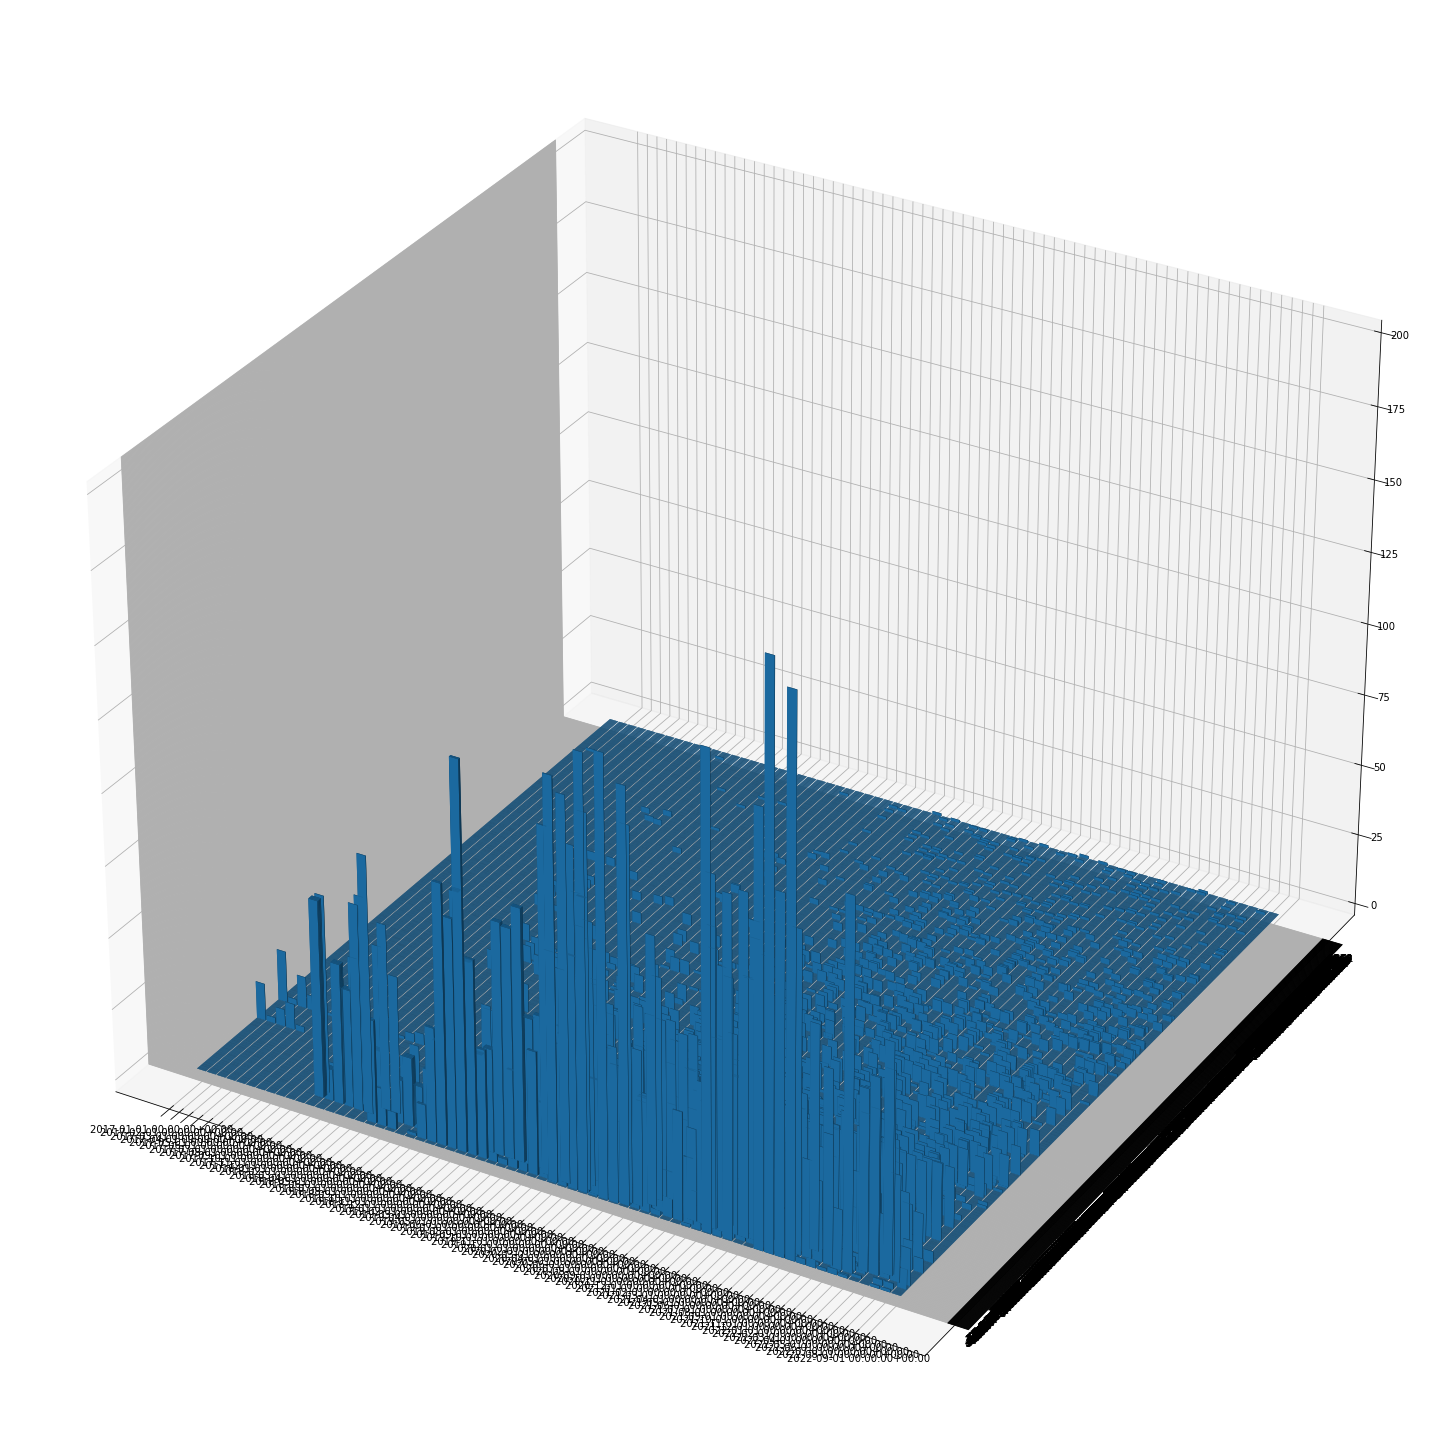

In [19]:

%matplotlib inline


from mpl_toolkits.mplot3d import Axes3D

# thickness of the bars
dx, dy = .9, .9

# prepare 3d axes
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(unstacked_df.shape[0])
ypos=np.arange(unstacked_df.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(unstacked_df.shape).flatten()

# the bars' heights
dz = np.array(manual_order).ravel()#unstacked_df.to_numpy().ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

# put the column / index labels
#ax.w_yaxis.set_ticklabels(eg.columns)
ax.w_xaxis.set_ticklabels(unstacked_df.index)
plt.show()

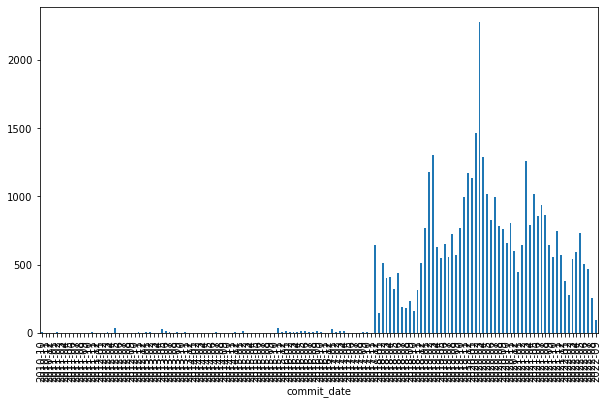

In [20]:
import matplotlib.pyplot as plt
from datetime import datetime

resampled = df.resample("MS").count()


ax = resampled.commits.plot(kind="bar")
locs, labels=plt.xticks()

ax.set_xticks(locs,[datetime.strftime(x,"%Y-%m") for x in list(resampled.index)])

plt.gcf().set_size_inches(10, 6)

plt.show()

In [21]:
resampled

,commits,repo_name
commit_date,,
2010-10-01 00:00:00+00:00,6,6
2010-11-01 00:00:00+00:00,0,0
2010-12-01 00:00:00+00:00,0,0
2011-01-01 00:00:00+00:00,0,0
2011-02-01 00:00:00+00:00,4,4
...,...,...
2022-05-01 00:00:00+00:00,733,733
2022-06-01 00:00:00+00:00,505,505
2022-07-01 00:00:00+00:00,466,466


In [22]:
resampled.to_csv("github_sum_commits.csv")

In [23]:
import peakdetect

peaks = peakdetect.peakdetect(resampled.commits, resampled.index, lookahead=4, delta=30)

In [24]:
peaks[0]

[[Timestamp('2017-12-01 00:00:00+0000', tz='UTC', freq='MS'), 648],
 [Timestamp('2019-03-01 00:00:00+0000', tz='UTC', freq='MS'), 1305],
 [Timestamp('2020-03-01 00:00:00+0000', tz='UTC', freq='MS'), 2275],
 [Timestamp('2021-03-01 00:00:00+0000', tz='UTC', freq='MS'), 1258]]

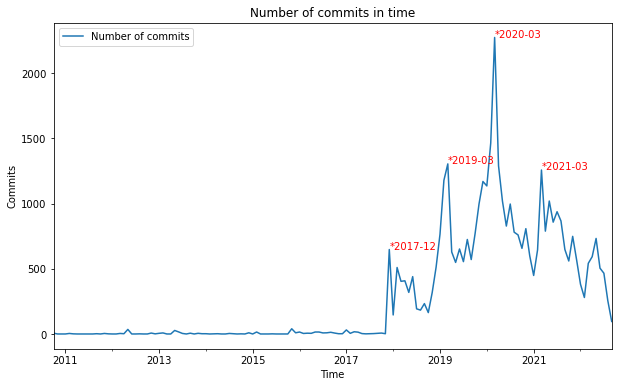

In [46]:

ax = resampled.commits.plot()
locs, labels=plt.xticks()

for peak in peaks[0]:
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]+1), fontsize=10, color="red")

ax.set_title("Number of commits in time")    
ax.legend(["Number of commits"])
ax.set_xlabel("Time")
ax.set_ylabel("Commits")
plt.gcf().set_size_inches(10, 6)
plt.show()

In [26]:
repodata_df = pd.DataFrame.from_dict(repo_data, orient="index")
repodata_df.rename(columns={0:"commit_count",1:"first_commit_date"}, inplace=True)
repodata_df["first_commit_date"]=pd.to_datetime(repodata_df["first_commit_date"])

repodata_df


,commit_count,first_commit_date
simsimee/Faceswap_and_Deepfake_Detection,17,2021-08-12 02:43:02+00:00
carlosdamirand/Deepfake,3,2020-11-28 16:36:03+00:00
manncodes/Deepfake-of-Elon-Tweets,31,2020-07-02 14:20:28+00:00
pamintandrei/deepfakedetection_challange_kaggle,1,2020-10-13 13:04:01+00:00
alexhaislip/Deepfake_creation,2,2021-07-15 03:44:28+00:00
...,...,...
milkywaydiehard/Non-Fungible-Deepfakes,9,2022-05-21 19:01:04+00:00
movebrickeffort/Privacy-Preserving-DeepFake-Face-Image-Detection,6,2021-11-16 13:46:48+00:00
ForrestPi/faceXray,1,2020-02-19 07:56:16+00:00
mmkuznecov/Unsupervised_deepfake_image_analysis,4,2021-03-02 22:52:48+00:00


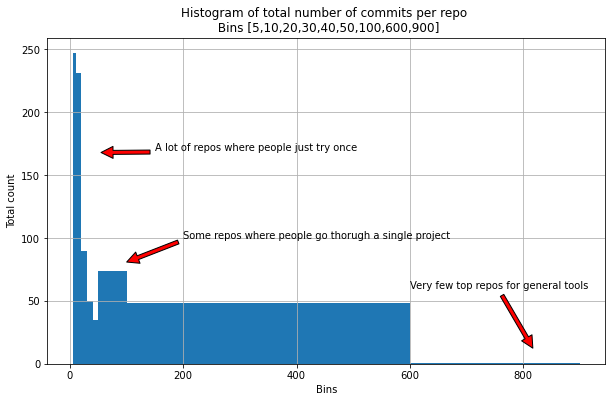

In [44]:
ax = repodata_df.commit_count.hist(bins=[5,10,20,30,40,50,100,600,900])


plt.title("Histogram of total number of commits per repo \n Bins [5,10,20,30,40,50,100,600,900]")
plt.gcf().set_size_inches(10, 6)
ax.annotate('Very few top repos for general tools', xy=(820, 10),  xycoords='data', xytext=(600, 60),arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate('A lot of repos where people just try once', xy=(50, 168),  xycoords='data', xytext=(150, 170),arrowprops=dict(facecolor='red', shrink=0.05))
ax.annotate('Some repos where people go thorugh a single project', xy=(95, 80),  xycoords='data', xytext=(200, 100),arrowprops=dict(facecolor='red', shrink=0.05))

ax.set_xlabel("Bins")
ax.set_ylabel("Total count")
plt.show()

In [28]:
repodata_df.sort_values(by="commit_count", ascending=False).head(25)

,commit_count,first_commit_date
deepfakes/faceswap,1626,2017-12-15 11:47:32+00:00
samq-research/deepfakes-faceswap,1562,2017-12-15 11:47:32+00:00
Joannaever/deepfakes,1411,2017-12-15 11:47:32+00:00
iperov/DeepFaceLab,1309,2018-06-04 13:10:00+00:00
sgg423/deepfakes,1309,2018-06-04 13:10:00+00:00
ekohendratno/deepfakes-faceswap,1306,2017-12-15 11:47:32+00:00
wjqhqzmd/deepfake,1219,2017-12-15 11:47:32+00:00
big-bombom/deepfake,990,2018-06-04 13:10:00+00:00
aakashpadhiyar/deepfake-live,985,2017-12-15 11:47:32+00:00
yfsin/deepfake_pro,985,2018-06-04 13:10:00+00:00


In [29]:
print("Total number of repos processed:",len(repodata_df))

Total number of repos processed: 1372
